# Physics 77, Lecture 4:  CSV, Functions, Loops,  and Array

## September 26, 2022
- Course announcement
    - HW and WS submission requirement
    - Overleaf Table template for HW02
    - Office hour utilization
- Some comments on submitted workshops
- Numpy Array
    - cont'd from the data file we built in the last lecture
        - structure of numpy array the axes 
            - illustrate the basics with simple examples
            dimension, shape, size
    - Array routines:
        - retrieving data
        - slicing 
        - array calculations, with functions
        - other built-in operations: mean, std, median
        - selection
        - Merge arrays with hstack, vstack
- Pandas intro
- Exploratory Task: Uproot / Particle Physics Data Analysis

# Course Announcement

## Homework and workshop submission 

If you do not follow this instruction, you would not receive credits for your homework AND workshop submission.

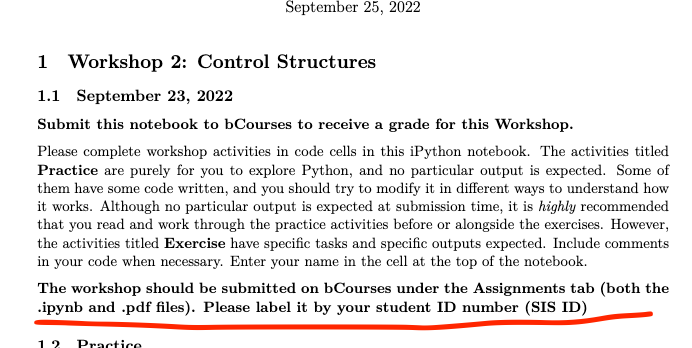


## Overleaf template 
- in HW02, you are supposed to process some txt file and format the printout in a way that LATEX can compile to a table
- I created a read-only overleaf project for you to copy
    - https://www.overleaf.com/read/tcdfsqftmtgf
    - As a UCB student, you have a free account to Overleaf Professional (https://www.overleaf.com/edu/berkeley). Just log on with your UCB email
    - To make a copy of this project, click the `Menu` icon on the upper left corner. Then you will have a project that you own and can edit
- You can just paste your printout to the LATEX source and compile it online
- Submit a screenshot of the table you create from Overleaf 
    - Bring a Markdown cell to edit mode, and select `Edit` in the top menu, and in the dropdown, select `Insert Image`, and then select the image file you created.

Your ouput would look like  
    
    signal & 31.98&72.54&12.71&77.11&155.25\\ 
    background & 4361.60&8782.60&1565.40&9732.40&13427.60\\ 
    significance & 0.48&0.77&0.32&0.78&1.34\\ 



## Office Hours utilization
- ### Krish Desai's office hours
- ### Daniel Huang
- ### Shrihan Agarwal

# Comments on workshop submissions

In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [ ]:
# since we'll do these operations over and over again, let's define a function
def checknp(x):
    print(x.ndim, x.shape, x.size)

#### Example 1 Function: 
check out this screenshot from one of your submissions. It does what we wanted to do, however, it was done in a concise and efficient manner. Whenever you have to repeat the same set of lines more than once, you should define a function to carry out the task these lines do. Repeating lines double the chance of making a mistake unwittingly. Plus, it reduces the `readability` of your code.



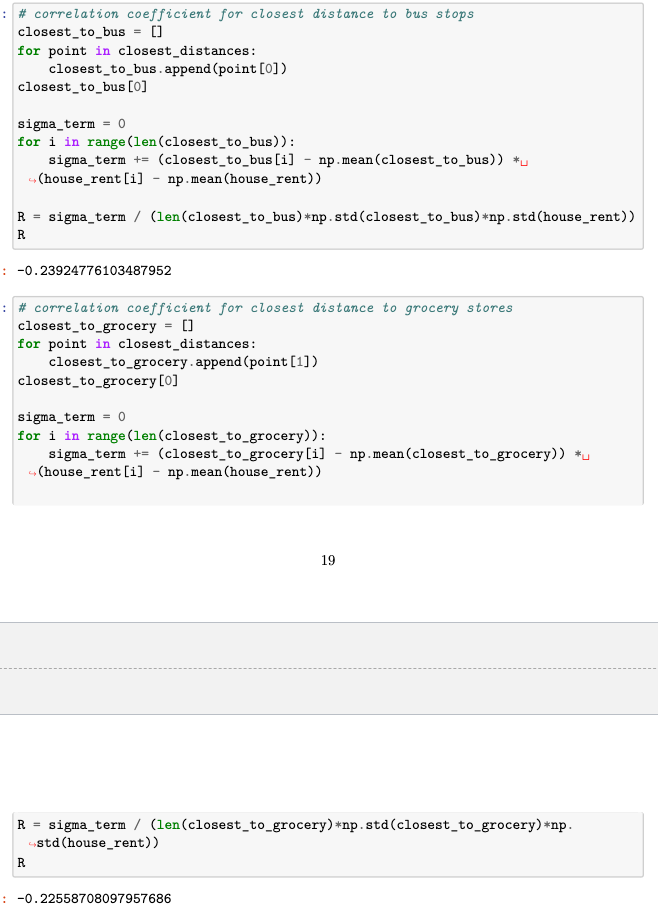



#### Example 2 calculational efficiency: 
In the same submission shown above: note that in the for loop, the mean and std are calculated. However, given the data sample, its mean and standard deviation are constants, not varying from one individual data point to another. So we should do this calculation just once, use it repeatedly in the loop.

Let's see the tests below to understand this point

    - `%%timeit` is a way to time the execution of a cell. You should place %%timeit at the top of the cell, and execute the cell. What this does is to execute the lines contained in the cell multiple times, and report the mean execution time as well as its standard deviation. 

In [ ]:
%%timeit
x = np.random.random((500,1))
    
xdev = []
for i in range( len(x)):
    xdev.append(x[i] - np.mean(x))
    
    


In [ ]:
%%timeit
x = np.random.random((500,1))
   
xmean = np.mean(x)    
xdev = []
for i in range( len(x)):
    xdev.append(x[i] - xmean)
    

#### Example 3: Logarithmic scales
In this submission, the author visualized data distributions. They made `scatter plots` to see the relation between the rent and bus/grocery distance. The author also realized that the scatter plots shown with linear scales are not so great for visualization, as most data points are sequeezed in a narrow vertical region at the low rent end. So the author decided to show the x and y axes in logarithmic scales. This is the right thing to do in this case, as the log scale would allow us to see data at the low rent end clearer. However, the author chose to calculate the logarithmic values of x and y and then plot them. This is conceptually fine, however, it could have been done in a much simpler way, with the xscale and yscale methods of matplotlib.pyplot

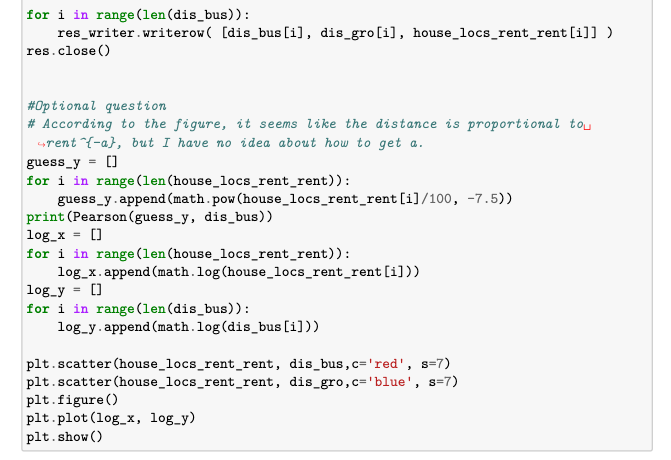


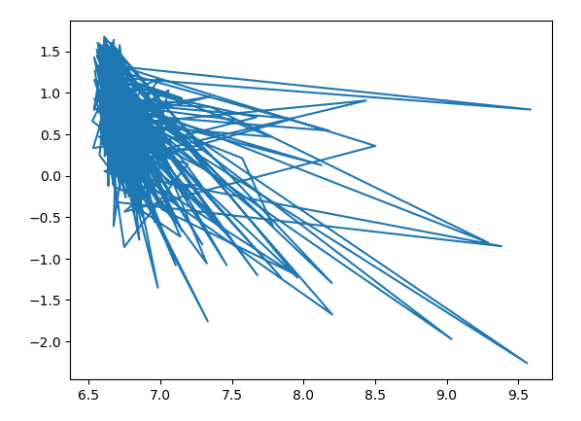

In [ ]:
x = np.random.exponential(scale = 50000, size = 500)
y = np.random.exponential(scale = 500, size = 500)*x


plt.plot(x,y)

In [ ]:
plt.scatter(x,y)

In [ ]:
plt.scatter(x,y)
plt.xscale('log')



In [ ]:
plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')


# Numpy Array
## from last lecture

We created a csv file that has four types of data for the 12 South American countries: 
##### GDP, capital population, and total population, and total area. 

These data were saved to `compiled_data.csv`

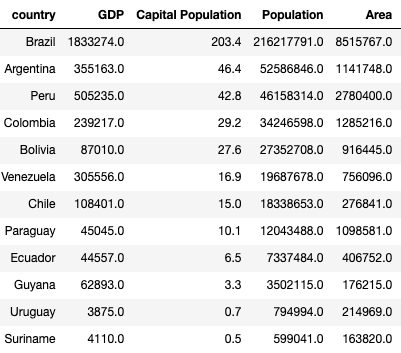

##### The actual array only contains the numbers!

In [ ]:
%cat compiled_data.csv

In [ ]:
# if you don't have this file through the bcourse link 
# you get download it from the web
# just uncomment the two lines below

# import os
# os.system('wget https://portal.nersc.gov/project/m3438/physics77/week5/compiled_data.csv')

In [ ]:
# we've also created dictinoary that maps country and area of the country
a2c = {8515767.0: 'Brazil', 2780400.0: 'Argentina', 1285216.0: 'Peru', 1141748.0: 'Colombia', 1098581.0: 'Bolivia', 916445.0: 'Venezuela', 756096.0: 'Chile', 406752.0: 'Paraguay', 276841.0: 'Ecuador', 214969.0: 'Guyana', 176215.0: 'Uruguay', 163820.0: 'Suriname'}

In [ ]:
cdata = np.genfromtxt('compiled_data.csv',delimiter=',')
checknp(cdata)
print(cdata)

### Discussion
- this array has TWO dimensions. What are they?
    - 12 is the size of the 1st dimension <-> dimension of countries
    - 4 is the size of the 2nd dimension <-> dimension of country data (population, total population, area, GDP
    -  ##### it is important to not confuse numpy dimensions with terminology we use in other context
    

In [ ]:
# think about a vector in the three dimensional space (x,y,z)
vector = [1, 0.5, 0.8]
npvector = np.array(vector)

checknp(npvector)

### Numpy structure - the axes
- in this case, the numpy array `npvector` only has one dimension 
- Dimensions in the numpy array represents the hierarcy in data 
    - in our example, we have a 2-D array with shape (12,4)
    - the first dimension is countries
    - the second dimension includes data properties of the same country

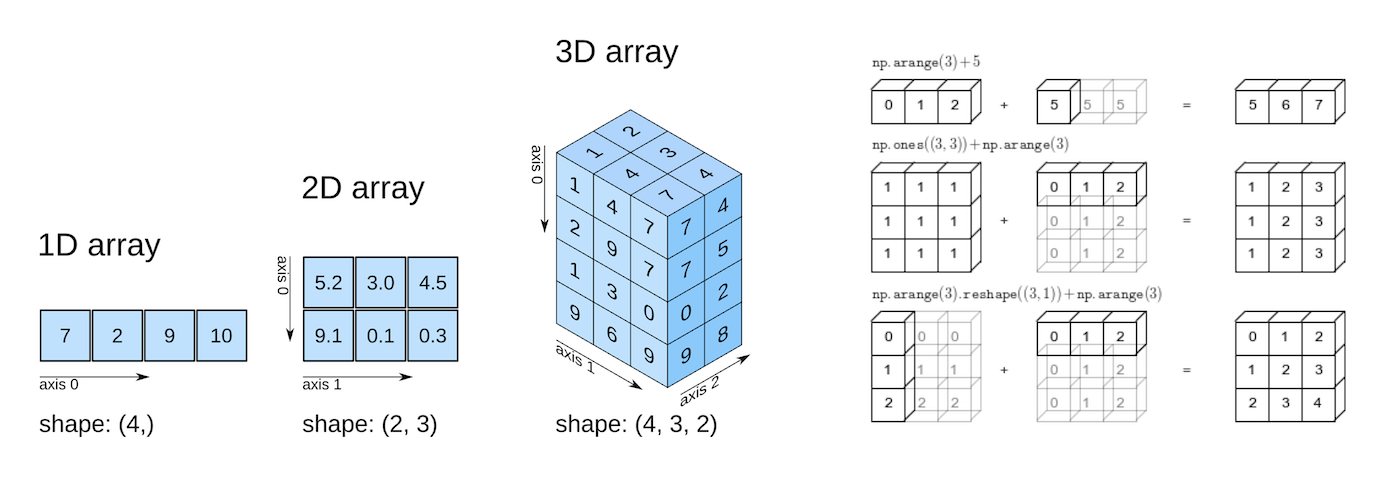


Let's play with the dimensions of array
- what are the differences between these operations

In [ ]:
a = np.array([1])
checknp(a)

In [ ]:
a = np.array([1,2])
checknp(a)

In [ ]:
a = np.array([[1]])
checknp(a)

In [ ]:
a = np.array([1],[2])
checknp(a)

In [ ]:
a = np.array([[1],[2]])
checknp(a)

In [ ]:
a = np.array([1],ndmin = 5)
checknp(a)
print(a)

In [ ]:
a = np.zeros((3,3))
checknp(a)
print(a)

In [ ]:
a = np.ones((3,3))
checknp(a)
print(a)

In [ ]:
b = np.zeros((3,3))
print(b)
a = np.ones_like(b)
checknp(a)
print(a)

In [ ]:
# what do these two input arguments do?
a = np.eye(3,3)
checknp(a)
print(a)

In [ ]:
alist = ['a', 'b', 'c', 'd']
a = np.asarray(alist)
print(alist)
print(a)

In [ ]:
alist = ['a', 'b', 'c', 45, 634.5,700]
a = np.asarray(alist)
print(alist)
print(a)

In [ ]:
a = np.reshape(a,(2,3))
print(a)

## Array  routines
use this as a reference for all array methods provided by Numpy
https://numpy.org/devdocs/reference/routines.html
- I encourage you to screen these pages, just to get an impression what's available
- while it is true when you get stuck with a problem, often you just need to google search, it is nonetheless still useful to know what methods numpy already provides. 


#### Let's see a real example
- let's continue with the array we have built
- see how we access data in the numpy array

In [ ]:
#retrieve elements of array

print(cdata)



In [ ]:
print(cdata[1]) # what is this?



In [ ]:
print(cdata[1,0])

- the indexing of numpy array element is the same as Python, and C/C++
    - index starts from 0, and runs to size - 1
    - in the case of multi-dimensional numpy array, the index runs to the size of the dimension - 1

In [ ]:
print(cdata.shape)
print(cdata[11])
print(cdata[11,3])

- What if we want to get the area data (1st entry of axis 1)?


In [ ]:
cdata[:,0]
# what does : and , do?

In [ ]:
# : is needed so that numpy knows we are keeping all entries along axis-0
cdata[,0]

In [ ]:
one_vertical_slice = cdata[:,0]
checknp(one_vertical_slice)
print(one_vertical_slice )

Pay attention to the dimension of the returned array. It is 1-D and with a shape of (12,).
- we not only got a slice of the original array but also changed the dimension of that slice
- in other words, we've lost the 2-D structure
- this can be recovered via reshape, and you'll see why it is useful later

In [ ]:
one_vertical_slice = np.reshape(one_vertical_slice,(12,1))


In [ ]:
checknp(one_vertical_slice )
print(one_vertical_slice )

# now it is 2-dimensional

### What about negative index?

In [ ]:
print(cdata[-1])

In [ ]:
print(cdata[0])
print(cdata[0,-1])
print(cdata[0,-4])
print(cdata[0,-5])

The negative index is interpreted as the position from the end of the array to the beginning of the array, i.e., the inverse order 

### Slice and dice


In [ ]:
# what if only the first 3 rows are useful?

data_first_3rows = cdata[0:3]
print(data_first_3rows)

In [ ]:
# what if only the middle two entries of the 2nd dimension are useful?
data_middle_2_of_2ndD = cdata[:,1:3]
print(data_middle_2_of_2ndD)

# of course there's no need to give awkward names to these arrays

checknp(cdata[:,1:3])

In [ ]:
# how about keeping the last two entries of the 2nd dimension?
print(cdata[:,2:])


In [ ]:
print(cdata[:,2:4])


In [ ]:
# Does it matter if the index goes beyond size -1 ?
print(cdata[:,2:5])

In [ ]:
# how do we achieve the same with negetive index?
print(cdata[:,-2:])

In [ ]:
#how about -2:4
print(cdata[:,-2:4])

##### a short cheat sheet

In [ ]:
data = np.array([1,2,3])
print(data[0])
print(data[1])
print(data[0:2])
print(data[1:])
print(data[-2:])


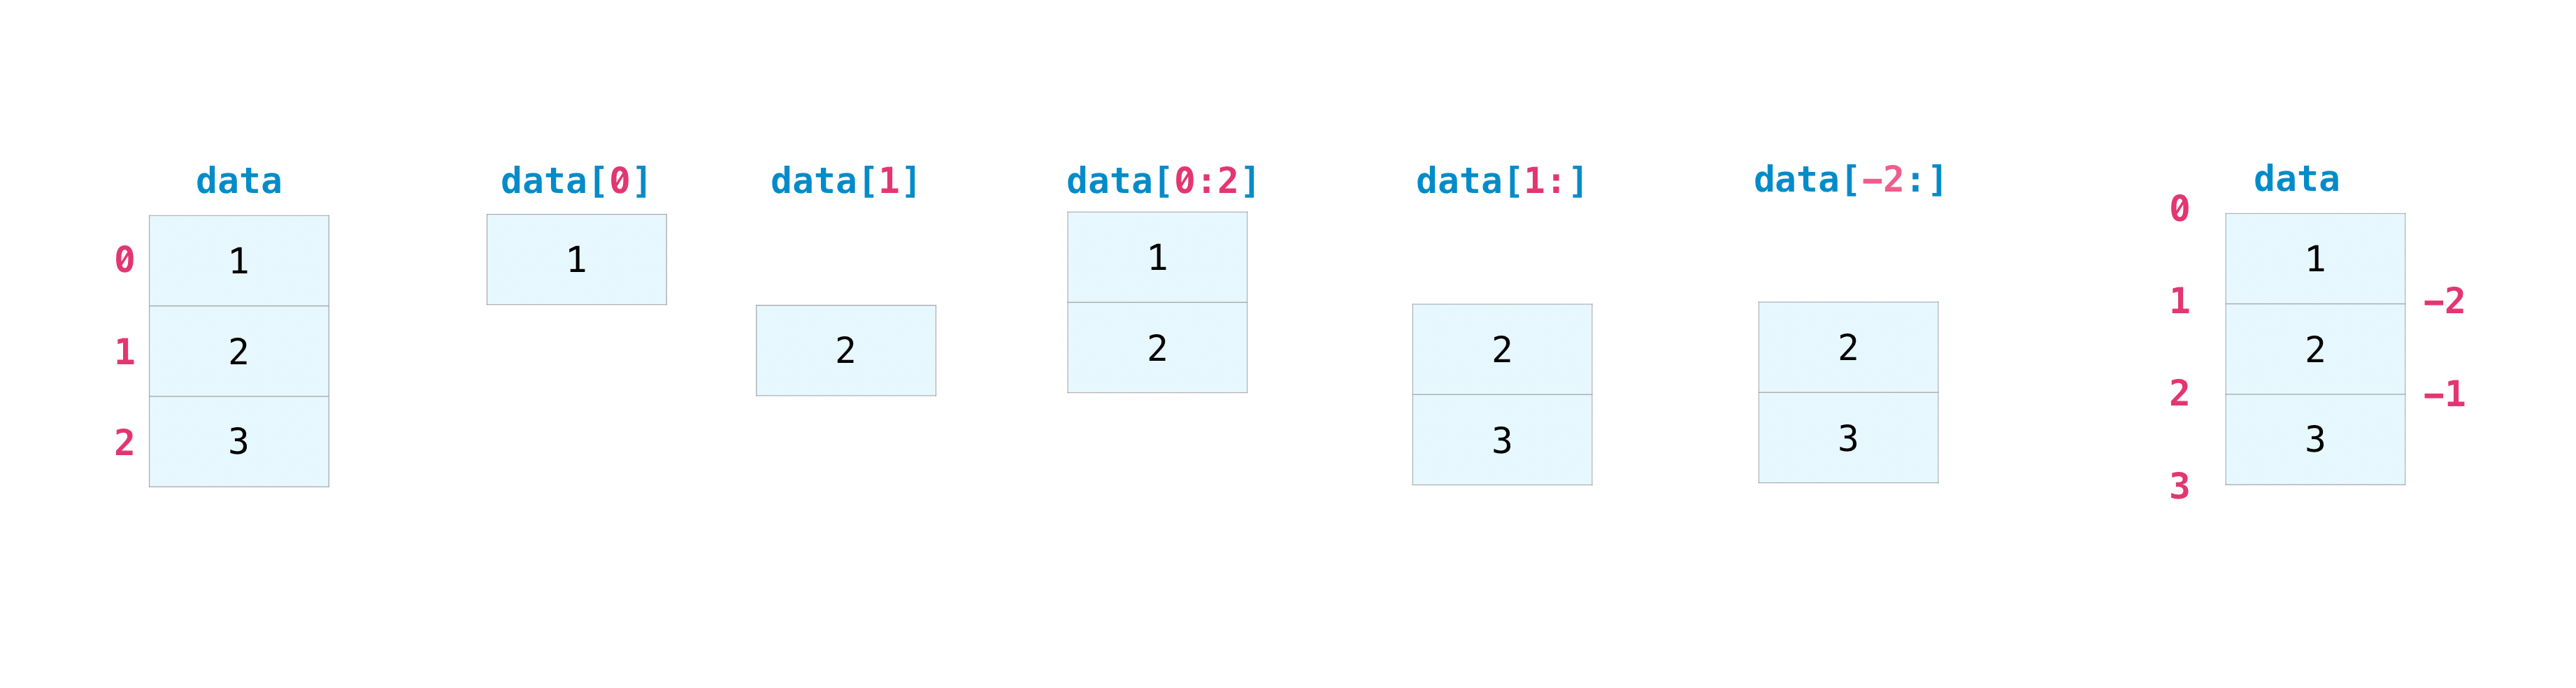
https://numpy.org/devdocs/user/absolute_beginners.html

### shapes
- shape of an array
- reshape an array
- transpose of an array

In [ ]:
print(cdata.shape)

In [ ]:
cdatanew = np.reshape(cdata, (4,12))
print(cdata.shape)
print(cdatanew.shape)

In [ ]:
print(cdatanew)
# what does reshape do here?

In [ ]:
cdata_T = np.transpose(cdata)
checknp(cdata_T)

print(cdata_T)

# transpose 
# now the first dimension has four entries, 
# they are correspponding to the four different data variables (pop, tot. pop., area, GDP)

In [ ]:
# transpose could be done simply with .T
cdata_Transpose = cdata.T
print(cdata_Transpose)

In [ ]:
# try a simpler one
a = np.array([[1,2],[3,4]])

# what's the dimension here?
checknp(a)

In [ ]:
print(a)
print(a.T) 


### Array calculation

- we have total population and GDP for each country, and we can calculate GDP per capita


In [ ]:
# recall the 1st entry in the 2nd dimension is the GDP
print(cdata[:,0])


In [ ]:
# the 3rd entry is the total population
print(cdata[:,2])


In [ ]:
print(cdata[:,0] / cdata[:,2]) 
# so what is the rule here?


- in array operations, the operation takes place between elements of array
    - in other arrays are not used as matrices, by default

- let's see a simple example 

In [ ]:
# Let's what this means in practice
# declare a 2-D array, and treat it as a 2x2 matrix and calculate its inverse

test = np.array([[1,0],[2,9]])
testInv = np.linalg.inv(test)

print(test)
print(testInv)

In [ ]:
print(test*testInv) # only need to see how -0.4444 comes out to know this is not matrix multiplication

In [ ]:
# Incidentally, you can use np.matmul method for matrix multiplication
product = np.matmul(test, testInv)
print(product)

# do we have an identity matrix?

### Arrays as input to a functoin
- how a function interprets the input arguments
- vectorize functions 
- numpy array friendly function with np methods


In [ ]:
def ratio (x,y):
    return x/y

In [ ]:
a , b = 15. , 10

print(ratio(a,b))

In [ ]:
ratio_array = ratio( cdata[:,0] , cdata[:,2])
print(ratio_array)

In [ ]:
import math as m
import numpy as np

def sqrt_of_ratio (x,y):
    return m.sqrt(x/y)

In [ ]:
sqrt_of_ratio(a,b)

In [ ]:
sqrtratio = sqrt_of_ratio( cdata[:,0], cdata[:,2])
# what happens?

- `only size-1 arrays can be converted to Python scalars`
    - in this example, math module takes care of the sqrt operation
    - math methods only take `scalars` as input argument, i.e., the variables have to be single valued
    
- Two possibile solutions
    - vectorize functions written with math methods
        - you've seen this from one of our workshops
    - use numpy methods to implement sqrt or other operations
    

In [ ]:
#vecterization
vectorized_sqrt_of_ratio = np.vectorize( sqrt_of_ratio)

sqrtratio = vectorized_sqrt_of_ratio( cdata[:,0], cdata[:,2])
print(sqrtratio)

In [ ]:
def np_sqrt_of_ratio (x,y):
    return np.sqrt(x/y)

In [ ]:
sqrtratio = np_sqrt_of_ratio( cdata[:,0], cdata[:,2])
print(sqrtratio)

In [ ]:
# btw, np.sqrt or other np math operations can also take scalars as input

print(np.sqrt(9))
print(np.sin(1.5))
print(np.cosh(1.5))
print(np.tanh(1.0))
print(np.log(10.0))
print(np.exp(10.0))


checknp(np.tanh(1.0))

# what does the printout of this line mean?

### Array elements operations
- sum 
- mean
- standard deviation

##### sum of the areas?

In [ ]:
area_of_country = cdata[:,3]
print(area_of_country)


In [ ]:
print(area_of_country.sum())
# .sum() method sums over all elements

In [ ]:
area_of_country = cdata[:,3].reshape(12,1)
print(area_of_country)
print(area_of_country.sum())
# .sum() method sums over all elements
# the shape of the array doesn't matter

#### Mean

In [ ]:
print(area_of_country.mean())

### Standard Deviation

### $\sigma = \sqrt{\frac{\sum{(x_i - \mu)^2}}{N}}$

square root of the mean squared difference from the mean 

In [ ]:
print(area_of_country.std())

In [ ]:
# now how about? what's the difference here
print(np.std(area_of_country))

#### median



In [ ]:
print(area_of_country.median())

- when we wrote area_of_country.median(), we assumed that numpy array object has a method of median(). However, this is not true. 
- we can see all methods provided by numpy.ndarray here https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html
    - median is not one of them
- this is when we need to use methods from numpy to directly operate on the numpy array 
    - for statistics methods available in numpy, see https://numpy.org/doc/stable/reference/routines.statistics.html

In [ ]:
median_area = np.median( area_of_country)

print( median_area )



### selection

#### what if we want to keep entries that satisfy certain requirement?

- for example Select countries whose area is greater than the median area?


In [ ]:
cdata = np.genfromtxt('compiled_data.csv',delimiter=',')

In [ ]:
#area is the last entry in the axis-1
cdata[:,3]


In [ ]:
# what do we get from this expression?
cdata[:,3]>median_area

In [ ]:
#let's what np.where does

np.where(cdata[:,3]>median_area)
# performs an element-else check if this condition is true

np.where(condition) returns an array of indices for which the condition is satisified 
np.where is one of several methods that come with numpy array for sorting, searching, and counting purposes
see https://numpy.org/doc/stable/reference/routines.sort.html for more 

In [ ]:
# now use np.where to make the selection
upper_half = cdata[np.where(cdata[:,3]>median_area)]

print(upper_half)
upper_half.shape
# do we get half of the 12 countries above the median?

- how about keep countries whose area is greater than the median area and GDP is smaller than the mean?

In [ ]:
mean_GDP = cdata[:,0].mean()

In [ ]:
#this is how we write the conditions
np.where(cdata[:,3]>median_area)

In [ ]:
np.where(cdata[:,0]<mean_GDP)

In [ ]:
# how do we take the log AND between them?

selection = np.where( (cdata[:,3]>median_area)* (cdata[:,0]<mean_GDP)  )
print(selection)

# recall (cdata[:,3]>median_area) and (cdata[:,0]<mean_GDP) are both arrays
# so their logic AND is basically the product of the two arrays


In [ ]:
cdata[selection]

In [ ]:
%%timeit
selected_dataset = cdata[selection]

- how about implementing the same thing in a for loop


In [ ]:
%%timeit
selected_dataset = []
for i in range(len(cdata[:,0])):
    if cdata[i,3] < median_area or cdata[i,0] > mean_GDP:
        continue
    selected_dataset.append(cdata[i,:])

selected_dataset = np.array(selected_dataset)
    

- `%%timeit` at the top of the cell is how we time the execution of a cell
    - the cell is executed multiple times so that we can get a mean execution time as well as a standard deviation
- Why is the for loop so much slower?
    - the underlying implementation of numpy array operation is done in compiled C software
    - compiled script is intrinsically much faster than the non-compiled, interpreted language such as Python
- Takeaway: avoid loops in Python if the operation can be implemented through numpy array methods

In [ ]:
# just to verify indeed we get the same thing from the for loop
print(selected_dataset)

### Merge arrays
- add the GDP per capita to our file


#### Calculation between different elements on the same axis

- let's calculate the following:
    - the GDP per capita
    

In [ ]:
cdata = np.genfromtxt('compiled_data.csv',delimiter=',')

In [ ]:
# since the four elements in the axis-2 are
# GDP, capital population (in millions), total population, area

GDPpc = 1e6 * cdata[:,0]/cdata[:,2]

# The raw values of GDP were in million USDs


In [ ]:
print(GDPpc)

##### Let's check dimension

In [ ]:
print(cdata.shape)
print(GDPpc.shape)

In [ ]:
print(cdata)
print(GDPpc)


for this purpose, we will utilize the hstack and vstack methods of numpy array
- hstack --> stack two arrays `horizontally`, implying that 1) two arrays have the same dimensions; 2) the number of entries in axis 0 are the same, the entries of the axis-1 are `concatenated`.

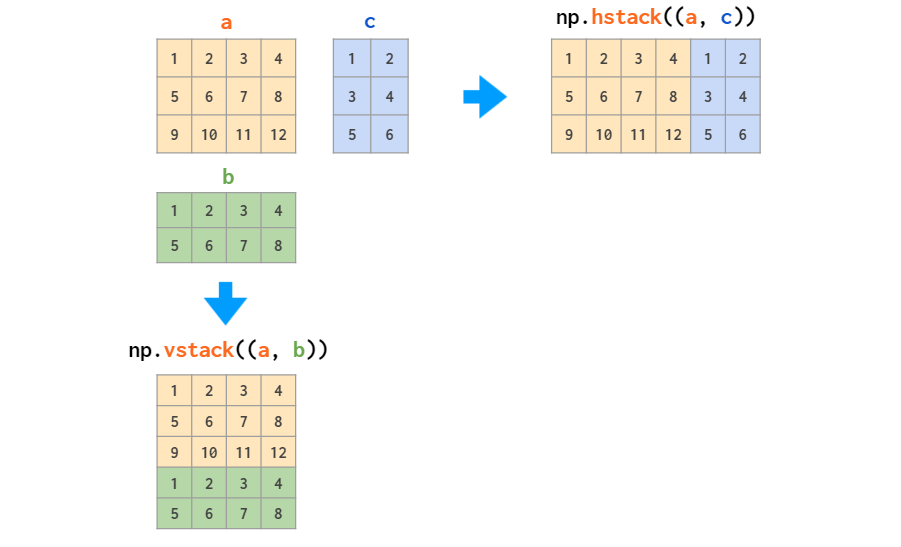

In [ ]:
newdata = np.hstack((cdata,GDPpc))

In [ ]:
GDPpc = GDPpc.reshape((12,1))
print(GDPpc)
# now this array becomes two-dimensional, with the second dimension (axis) having just one entry

In [ ]:
# Let's try hstack again
newdata = np.hstack((cdata,GDPpc))
print(newdata)
print(newdata.shape)

#### what if we want to use vstack instead?
- recall we have the ability to rotate the array through transpose
- vstack (see the cartoon a few cells ago) implies that 1) both arrays are 2-D; 2) their 2nd dimensions have the same number of entries

In [ ]:
newdatav2 = np.vstack(( cdata, GDPpc))

In [ ]:
print(cdata.shape)
print(GDPpc.shape)
# their 1st dimensions/axes have the same number of entries

In [ ]:
# let's rotate them via transpose
print(cdata.T.shape)
print(GDPpc.T.shape)


In [ ]:
#now that they both have 12 entries for their axis-1
# we can do a vstack
newdatav2 = np.vstack(( cdata.T, GDPpc.T))

In [ ]:
print(newdatav2)
# how are these data organized?

In [ ]:
# let's rotate it back to the original arrangement
newdatav2 = newdatav2.T
print(newdatav2)
print(newdatav2.shape)
# now the GDP per capita is the fifth entry of the axis-1

#### let's make some plots


In [ ]:
area = newdata[:,3]


plt.scatter(area, GDPpc)
plt.xlabel('Area [km$^2$]')
plt.ylabel('GDP per capita [USD]')
plt.xscale('log')
plt.yscale('log')
for i in range(len(area)):
    plt.annotate( a2c[area[i]], (area[i]+3,GDPpc[i]-500))
    

# Pandas intro

## Motivation

- so far, we've been memorizing the position of variable in axes to keep track of many different varaibles
- naturally, one would ask why can't we have some headers
- we will add the header for `columns` and `rows` 
- let's see what happens

In [ ]:
#Let's retrieve country names from the dictionary

area_country = np.array(list(a2c.items()))
# what do we have in area_country?
print(area_country)

In [ ]:
# only take the 2nd entry of axis1
area_country = area_country[:,1].reshape(12,1)
print(area_country.shape)



In [ ]:
newdatav2 = np.hstack((area_country, newdatav2))

print(newdatav2)
print(newdatav2.shape)

#what happens?

#### after the country name array was stacked to data array, all data entries turn to string type
- not so ideal
- data structures such as pandas handle these scenarios quite well 


##### adding header to `columns`

In [ ]:
header = np.array(['country','GDP','Capital Population','Population','Area', 'GDP per capita'])
checknp(header)

In [ ]:
newdatav2 = np.vstack((header,newdatav2))


In [ ]:
print(newdatav2)

## Pandas data frame

- just like the ndarray object to numpy array, pandas' basic data structure is called a `data frame`
- we'll see some simple operations with dataframes
- first, let's write our numpy array hosted data to a csv file

#### write this array to a csv file

In [ ]:
# let's write this complex array to a csv file
np.savetxt('SAdata.csv', newdatav2, delimiter = ',', fmt = '%s')

In [ ]:
%ls -ltr SAdata.csv
%cat SAdata.csv

### Pandas 
- import data from csv
- visualization
- retrieve data 

In [ ]:

import pandas as pd

df = pd.read_csv('SAdata.csv')
print(df)

In [ ]:
# or even nicer
df

In [ ]:
print(df['GDP per capita'])

In [ ]:
df['GDP'].head()

In [ ]:
# what is the type of this?
type(df['GDP'])

In [ ]:
df['GDP per area'] = df['GDP'] *1e6 / df['Area']
# let's what happens to the dataframe after this

In [ ]:
df

In [ ]:
df.info()
# which gives you a summary of data contained in the DataFrame

In [ ]:
df[['GDP per capita','Area']]

In [ ]:
df[['GDP per capita','Area']].median()

In [ ]:
subdf = df[['GDP per capita','Area']]

print(subdf.mean())
type(subdf.mean())

# Optional Exploratory Task 

If you are proficient with Python or at least you are least familiar with operations earlier in this notebook, and if you have reached this part of the notebook while the lecture is still ongoing, then this is an open-ended explorative exercise for you.

## Background

In this part, we will be loading and analyzing data from a ROOT file. ROOT is a software package developed by physicists at CERN for High Energy Physics data analysis. If you can find everything you want to know about ROOT at this webpage https://root.cern/

While ROOT has many powerful functionalities for data analysis, we will not dedicate any significant fraction of this analysis to ROOT. Rather, we will load data from ROOT files to data structures such as numpy arrays and perform data analysis using Python libraries more widely used in the data science community.

## ROOT Tree 


## Uproot
There are many python software packages that convert root file to numpy arrays. Here we will use UPROOT. The full documentation of uproot can be found here
https://uproot.readthedocs.io/en/latest/index.html

and I would start with their `Getting Started Guide` examples https://uproot.readthedocs.io/en/latest/basic.html

### Below are some semi-structured guidelines

Because datahub@berkeley doesn't have uproot install, we will install it on the fly

In [ ]:
!pip install uproot awkward

In [ ]:
# once installed, let's import it

import uproot

#load a root file from somewhere. in this example, it is on the web, but usually it is on your local disk

# this file is provided by uproot authors for demos

file = uproot.open("https://scikit-hep.org/uproot3/examples/nesteddirs.root") 

# I have another root file here https://portal.nersc.gov/project/m3438/physics77/2012.root you can also check that out

# Let's what's inside the root file

print(file.keys())
print(file.classnames())



# directly open the object called 'events' in the root file
# N.B. this is a different file!!
events = uproot.open("https://scikit-hep.org/uproot3/examples/Zmumu.root:events")


# See what variables are available there
events.keys()

events.values()

# Loading a branch
M = events['M']
type(M)

# Other ways to browser variables in the file
# note that typenames are names of C++ types as ROOT files are created with C++
events.typenames()
events.show()

# How to load all the mass values to a numpy array
M = events['M'].array(library='np')
M.shape


# Load other variables
E1 = events['E1'].array(library='np')
E2 = events['E2'].array(library='np')

px1 = events['px1'].array(library='np')
px2 = events['px2'].array(library='np')

py1 = events['py1'].array(library='np')
py2 = events['py2'].array(library='np')

pz1 = events['pz1'].array(library='np')
pz2 = events['pz2'].array(library='np')


Q1 = events['Q1'].array(library='np')
Q2 = events['Q2'].array(library='np')

pz2.shape



A bit physics background:
* The variables that are in the events object (which corresponds to a TTree in ROOT) have the same shapes.
    * We saw mass has a shape of (2304,), so do pz2, E1, px1, etc.
    * in this example, the whole file contains a sample of collision events
    * there are 2304 collisions in this sample/file
* this sample of collisions all have exactly two leptons 
    * the kinematics of a lepton is described with its four momentum (E, momentum)
    * since momentum is a vector, the four momomentum, aka four vector, of the lepton, has four components (E, px, py, pz)
    * Einstein's mass momentum relation gives us $m^2 = E^2 - |\vec{p}|^2$
        * so you can calculate the mass of a lepton with the above formula, or simply $M = \sqrt{E^2 - (p_x^{2}+p_y^{2}+p_z^{2})}$
        
* can you calculate the mass for lepton1 and lepton2 and draw their distribution separately?
    * note that the numbers 1 and 2 in the variable names are indices of leptons.
    * i.e., E1, px1, py1, pz1 are properties of the same lepton, lepton 1; while those with 2 in name are properties of lepton 2
    
* can you calculate the mass of the di-lepton system?
    * what this means is that you consider the two leptons as a single physical system
    * as such, that dilepton system would have an Energy of E1+ E2, and a momentum of $\vec{p_{ll}} = \vec{p_{1}} + \vec{p_{2}}$. N.B. the momentum sum is always a vector sum
    * this quantity is also known as the invariant mass of dilepton system ($m_{ll}$)
    * how does this distribution look like?
    * how does the invariant mass of dilepton system compare to the sum of two individual lepton masses?
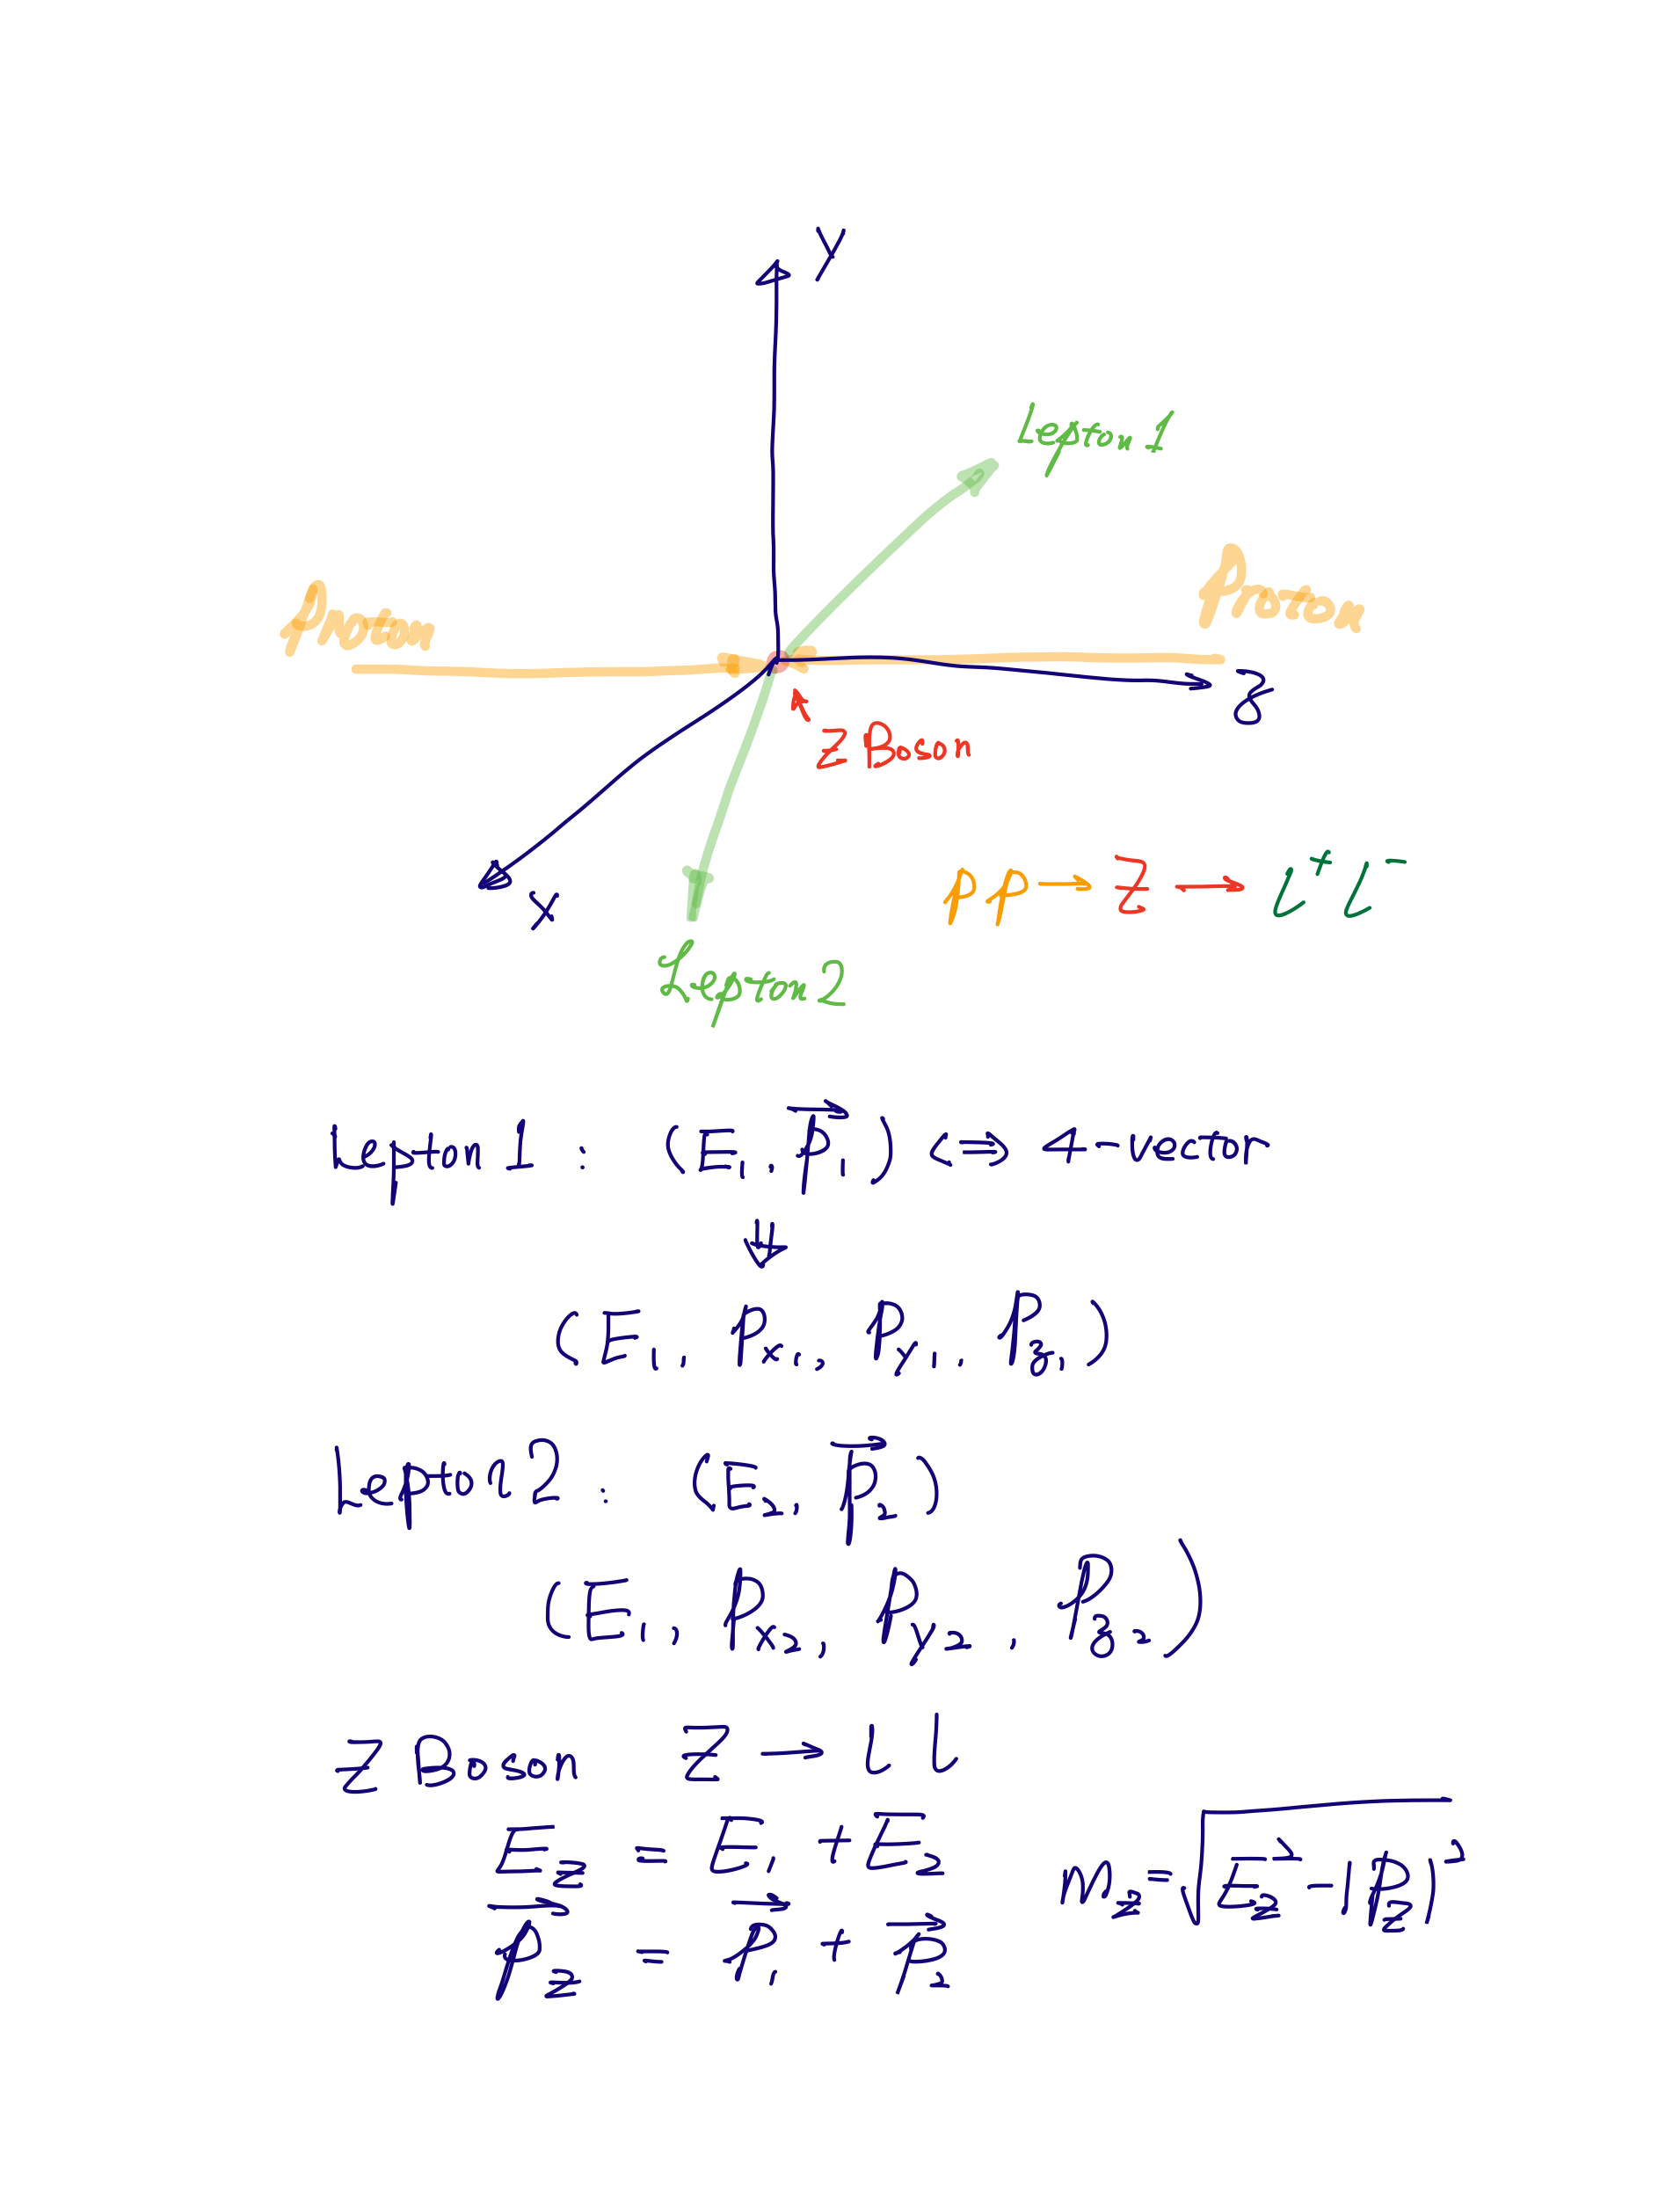

In [ ]:
def mass (E, px, py, pz):
    return np.sqrt(E**2 - (px**2 + py**2 + pz**2))


In [ ]:
def pt (px, py):
    return np.sqrt(px**2 + py**2)

In [ ]:
checknp(E1)
print(E1)
M1 = mass(E1, px1,py1,pz1)

E_mumu = E1 + E2
px_mumu = px1 + px2
py_mumu = py1 + py2
pz_mumu = pz1 + pz2

M_mumu = mass(E_mumu, px_mumu, py_mumu, pz_mumu)


now I want to clean up my data. 
- I know the sample would be cleaner 
    - if both leptons have higher transverse momenta, say, 30 GeV and beyond
    - if the electric charges of the two leptons are opposite 

How do I implement these selections with numpy arrays?

Here's my strategy:
- understand the dimension of data involved in this problem
    - what variables will be used? Q1, Q2 for the charges of leptons, transverse momenta of leptons pt1, pt2, the invariant mass of dilepton pair, the transverse momentum of the dilepton pair. 
    - In total, six variables
    - these six variables are different aspects of the same collision. Think about body weight, height, blood pressure, etc. They are different aspects of the same person's medical data.
    
- create a numpy array with 2 dimensions. Each entry in the axis-0 would be a collision event. The axis-1 would record the six variables of each collision event
    - technically, this is achieved by hstack or vstack

- use np.where method to implement selection

In [ ]:
# let's check our starting point

pt1 = pt(px1, py1)
pt2 = pt(px2, py2)

checknp(Q1)
checknp(Q2)
checknp(pt1)
checknp(pt2)
checknp(M_mumu)
checknp(pt_mumu)

In [ ]:
data=np.hstack((Q1,Q2,pt1,pt2,M_mumu, pt_mumu))
checknp(data)
# Does this work?

In [ ]:
Q1 = Q1.reshape((2304,1))
Q2 = Q2.reshape((2304,1))
pt1 = pt1.reshape((2304,1))
pt2 = pt2.reshape((2304,1))
M_mumu = M_mumu.reshape((2304,1))
pt_mumu = pt_mumu.reshape((2304,1))


In [ ]:
data=np.hstack((Q1,Q2,pt1,pt2,M_mumu, pt_mumu))
checknp(data)
# Does this work?

In [ ]:
print(data)

### now let's implement the selections
- two leptons have opposite charges
- two leptons both have their pT > 30 GeV

In [ ]:
# opposite charges
np.where(data[:,0]*data[:,1] == -1)

In [ ]:
data_oc = data[np.where(data[:,0]*data[:,1] == -1)]
checknp(data_oc)

# what do we learn from the print out?

In [ ]:
# lepton pt > 30 
np.where( (data[:,2] > 30 and data[:,3]>30))

#why?

In [ ]:
np.where( (data_oc[:,2] > 30)* (data_oc[:,3]>30))

In [ ]:
data_pTcut = data_oc[ np.where( (data_oc[:,2] > 30)* (data_oc[:,3]>30)) ]

checknp(data_pTcut)

In [ ]:
plt.hist(data_pTcut[:,4],bins=50,range=(0,200))
plt.xlabel('Invariant Mass of Lepton Pair [GeV]')
plt.ylabel('Number of Entries / 4 GeV')

In [ ]:
#%%timeit
data_oc = data[np.where(data[:,0]*data[:,1] == -1)]
data_pTcut = data_oc[ np.where( (data_oc[:,2] > 30)* (data_oc[:,3]>30)) ]
mass_selected = data_pTcut[:,4]

checknp(mass_selected)

#### now let's try the same thing with a for loop

In [ ]:
#%%timeit

mass_selected = []
for i in range(len(pt1)):
    if pt1[i] < 30 or pt2[i] < 30 or Q1[i]*Q2[i] == 1:
        continue
    mass_selected.append(M_mumu[i])

mass_selected = np.array(mass_selected)

checknp(mass_selected)


In [ ]:
plt.hist(mass_selected,bins=50,range=(0,200))
plt.xlabel('Invariant Mass of Lepton Pair [GeV]')
plt.ylabel('Number of Entries / 4 GeV')

In [ ]:
plt.hist(M_mumu)

In [ ]:
pt_mumu = pt(px_mumu, py_mumu)
plt.hist(pt_mumu)

In [ ]:
plt.scatter(pt_mumu, M_mumu)

## Can you preproduce the above operations with Pandas?